In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Read Data

In [2]:
# 根据打印出的文件路径，将文件读取进内存
# sample_submission = pd.read_csv('sample_submission.csv')
# train_data = pd.read_csv('train.csv')
# test_data = pd.read_csv('test.csv')
from google.colab import files
uploaded = files.upload()

Saving cleaned_training_set.csv to cleaned_training_set.csv


In [5]:
import io
# train_data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# test_data = pd.read_csv(io.BytesIO(uploaded['test.csv']))
# Dataset is now stored in a Pandas Dataframe


In [6]:
train_data.shape, test_data.shape

((47439, 41), (31626, 40))

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号
pd.set_option('display.max_columns', None)    # 显示所有列
pd.set_option('display.max_rows', 200)        # 最多显示200行

In [8]:
train_copy = train_data.copy()
test_copy = test_data.copy()

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Sold Price'),
 Text(0.5, 1.0, 'Frequency Histogram')]

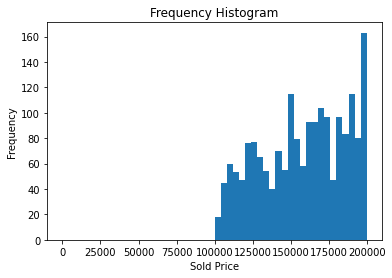

In [78]:
# Explore distribution of bathrooms variable
plt.hist(train_copy['Sold Price'], bins=50,range=[0,2000000])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Sold Price')
# plt.savefig('bathroom_frequency.png')

In [79]:
trans_sold = np.log2(train_copy['Sold Price'])


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Sold Price'),
 Text(0.5, 1.0, 'Frequency Histogram')]

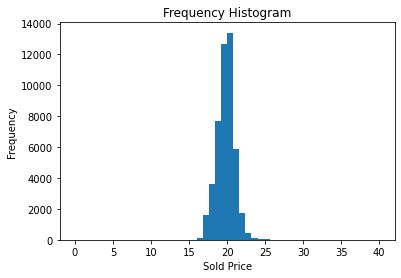

In [86]:
plt.hist(trans_sold, bins=50,range=[0,40])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Sold Price')


In [73]:
train_copy[:20]

,Id,Address,Sold Price,Summary,Type,Year built,Heating,Cooling,Parking,Lot,Bedrooms,Bathrooms,Full bathrooms,Total interior livable area,Total spaces,Garage spaces,Region,Elementary School,Elementary School Score,Elementary School Distance,Middle School,Middle School Score,Middle School Distance,High School,High School Score,High School Distance,Flooring,Heating features,Cooling features,Appliances included,Laundry features,Parking features,Tax assessed value,Annual tax amount,Listed On,Listed Price,Last Sold On,Last Sold Price,City,Zip,State
0,0,540 Pine Ln,3825000.0,"540 Pine Ln, Los Altos, CA 94022 is a single f...",SingleFamily,1969.0,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",1.0,"Ground Floor Bedroom, Master Bedroom on Ground...",0.0,NaN,1.0,0.0,0.0,Los Altos,Santa Rita Elementary School,7.0,0.4,NaN,NaN,NaN,Los Altos High School,8.0,1.3,"Tile, Hardwood, Carpet","Forced air, Gas",Central,"Dishwasher, Dryer, Garbage disposal, Microwave...","Washer / Dryer, Inside, In Utility Room","Garage, Garage - Attached, Covered",886486.0,12580.0,2019-10-24,4198000.0,NaN,NaN,Los Altos,94022,CA
1,1,1727 W 67th St,505000.0,"HURRY, HURRY.......Great house 3 bed and 2 bat...",SingleFamily,1926.0,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",4047.0,3,2.0,2.0,872.0,1.0,1.0,Los Angeles,Raymond Avenue Elementary School,3.0,0.8,John Muir Middle School,2.0,1.1,Augustus F. Hawkins High A Critical Design And...,2.0,1.3,NaN,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...",NaN,Inside,"Detached Carport, Garage",505000.0,6253.0,2019-10-16,525000.0,2019-08-30,328000.0,Los Angeles,90047,CA
2,2,28093 Pine Ave,140000.0,'THE PERFECT CABIN TO FLIP! Strawberry deligh...,SingleFamily,1958.0,Forced air,NaN,0 spaces,9147.0,2,3.0,1.0,1152.0,0.0,0.0,Strawberry,NaN,NaN,NaN,NaN,NaN,NaN,Long Barn High School,NaN,10.1,NaN,Forced air,NaN,NaN,NaN,NaN,49627.0,468.0,2019-08-25,180000.0,NaN,NaN,Strawberry,95375,CA
3,3,10750 Braddock Dr,1775000.0,Rare 2-story Gated 5 bedroom Modern Mediterran...,SingleFamily,1947.0,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",NaN,5,3.0,3.0,2612.0,0.0,0.0,Culver City,Farragut Elementary School,9.0,0.2,Culver City Middle School,7.0,0.2,Culver City High School,8.0,0.2,"Wood, Tile",Central,Central Air,Dishwasher,"Stackable, Upper Level","Detached Carport, Driveway, Garage - Two Door",1775000.0,20787.0,2019-10-24,1895000.0,2016-08-30,1500000.0,Culver City,90230,CA
4,4,7415 O Donovan Rd,1175000.0,Beautiful 200 acre ranch land with several pas...,VacantLand,NaN,NaN,NaN,0 spaces,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Creston,Santa Margarita Elementary School,6.0,8.5,Atascadero Middle School,5.0,10.2,Atascadero High School,6.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-07,1595000.0,2016-06-27,900000.0,Creston,93432,CA
5,5,922 E Channel St,221000.0,"922 E Channel St, Stockton, CA 95202 is a sing...",SingleFamily,1905.0,Wall Furnace,Window Unit(s),Carport,3576.0,3,2.0,2.0,1311.0,0.0,0.0,Stockton,NaN,NaN,NaN,NaN,NaN,NaN,Stagg Senior High School,2.0,3.3,"Wood, Tile","None, Wall",NaN,Range / Oven,Inside Area,Carport,208080.0,2531.0,2019-10-30,224900.0,2017-12-28,200000.0,Stockton,95202,CA
6,6,1926 Mellon Ave,1589000.0,Two newly built modern farm houses in super ho...,Unknown,1926.0,Central,Central Air,"Driveway, Garage",NaN,NaN,NaN,NaN,NaN,0.0,0.0,Los Angeles,Allesandro Elementary School,8.0,0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central,Central Air,"Dishwasher, Disposal, Refrigerator",NaN,"Driveway, Garage",1589000.0,19220.0,2019-10-28,1599000.0,2018-03-14,500000.0,Los Angeles,90039,CA
7,7,9013 N Valley Rd,480000.0,"9013 N Valley Rd, Taylorsville, CA 95983 is a ...",SingleFamily,2005.0,"Forced air, Propane / Butane, Solar",Other,"Carport, Garage - Attached, Covered",1771149.6,3,2.0,2.0,2519.0,4.0,4.0,Taylorsville,Indian Valley Elementary School,4.0,6.3,NaN,NaN,NaN,Greenville Junior/Senior High Sch

In [10]:
train_nan = pd.DataFrame(train_data.isnull().sum(), columns=['nan_sum'])
train_nan['percentage %'] = train_nan['nan_sum'] / train_data.shape[0] * 100
train_nan


,nan_sum,percentage %
Id,0,0.000000
Address,0,0.000000
Sold Price,0,0.000000
Summary,350,0.737790
Type,0,0.000000
Year built,1045,2.202829
Heating,6465,13.628028
Cooling,10622,22.390860
Parking,908,1.914037
Lot,14181,29.893126


In [11]:
# test data missing
test_nan = pd.DataFrame(test_data.isnull().sum(), columns=['nan_sum'])
test_nan['percentage %'] = test_nan['nan_sum'] / test_data.shape[0] * 100
test_nan

,nan_sum,percentage %
Id,0,0.000000
Address,0,0.000000
Summary,489,1.546196
Type,0,0.000000
Year built,897,2.836274
Heating,5048,15.961551
Cooling,4487,14.187694
Parking,768,2.428382
Lot,8808,27.850503
Bedrooms,1726,5.457535


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


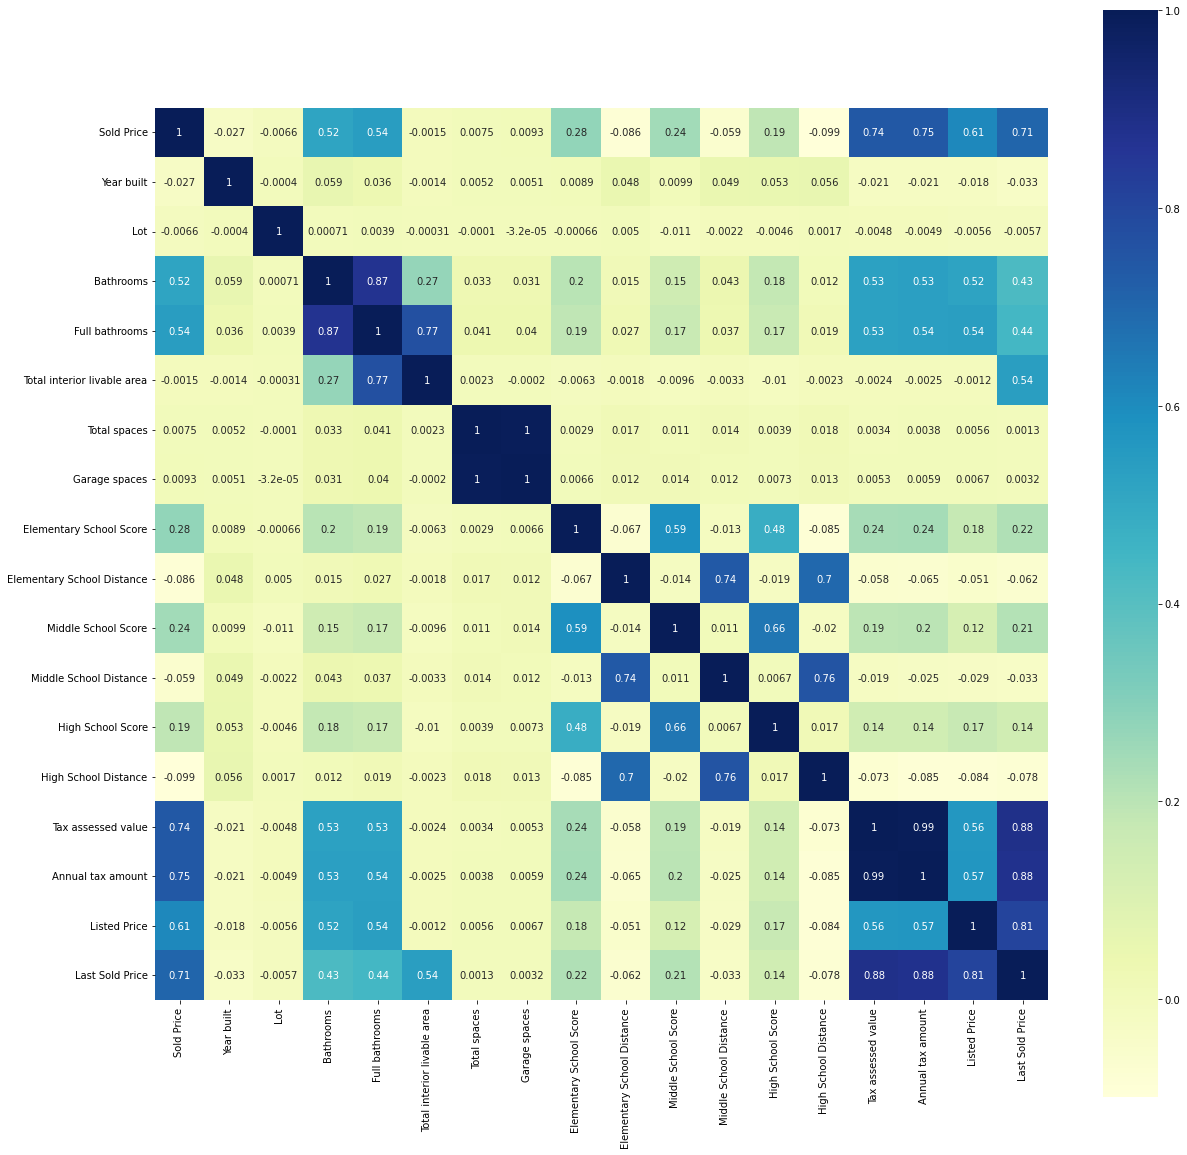

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize = (20,20))
sns.heatmap(train_copy.drop(['Id','Zip'],axis=1).corr(), square = True, cmap="YlGnBu",annot = True)
plt.savefig("output.png", dpi=300)


# EDA

## Merge training set and testing set

In [14]:
## ==========拼接train 和 test==============
target = train_data['Sold Price']
test_id = test_data['Id']
train_data = train_data.drop(['Id','Sold Price'], axis = 1)
test_data = test_data.drop('Id', axis = 1)

train_test = pd.concat([train_data, test_data], axis = 0, sort = False)

features = ['Listed Price', 'Last Sold Price', 'Tax assessed value', 'Garage spaces','Bedrooms','Listed On','Type','Bathrooms','Full bathrooms',
            'Total interior livable area', 'Year built', 'Lot', 'Annual tax amount','City','Zip',
            'Elementary School','Middle School','High School','Elementary School Score','Middle School Score','High School Score',
            'Elementary School Distance','Middle School Distance','High School Distance',
            'Heating','Cooling','Parking']

# 特征选择
train_test = train_test[features]

## Bathrooms variable EDA

In [14]:
## Counts unique value of Bathrooms varibales
train_data['Bathrooms'].value_counts()

2.0     19594
3.0     11208
1.0      7863
4.0      2974
5.0       993
0.0       497
6.0       457
7.0       165
8.0        93
9.0        46
10.0       32
11.0       22
12.0       10
13.0        6
14.0        5
16.0        2
18.0        1
21.0        1
17.0        1
24.0        1
19.0        1
20.0        1
15.0        1
Name: Bathrooms, dtype: int64

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


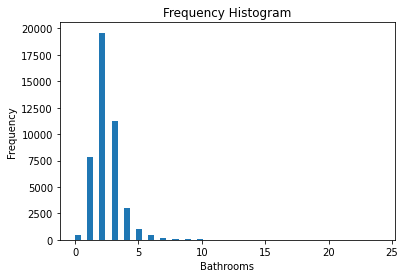

In [15]:
# Explore distribution of bathrooms variable
plt.hist(train_copy['Bathrooms'], bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Bathrooms')
plt.savefig('bathroom_frequency.png')

## Garage space variable EDA

1667
0.978351145681823


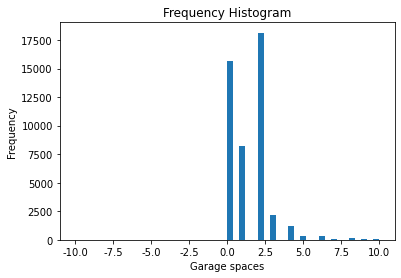

In [16]:
# Distribution of garage space variable 
plt.hist(train_copy['Garage spaces'], bins=50,range=[-10,10])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Garage spaces')
print(train_test['Garage spaces'].isnull().sum())
counter = 0
for x in train_data['Garage spaces']:
    if x>=0 and x<=10:
        counter += 1
print(counter / len(train_data['Garage spaces']))

## Year built variable EDA

1973.0    828
2020.0    740
1950.0    733
1972.0    672
2006.0    671
1947.0    662
1955.0    662
1948.0    656
1979.0    653
2005.0    634
1960.0    633
1963.0    626
1924.0    624
1971.0    619
1965.0    614
1977.0    612
2007.0    611
1959.0    606
1978.0    602
1923.0    597
1964.0    592
1956.0    590
1954.0    574
1925.0    565
2004.0    563
1980.0    558
1970.0    556
1961.0    550
1981.0    540
1988.0    532
1962.0    530
1953.0    529
1951.0    526
2019.0    519
1952.0    518
1974.0    509
1985.0    499
1922.0    495
1926.0    494
1976.0    487
2008.0    481
1984.0    478
1949.0    472
1940.0    470
1958.0    468
1900.0    466
1975.0    466
1986.0    464
1968.0    449
1957.0    441
1990.0    438
1989.0    420
1966.0    410
2003.0    396
2000.0    393
1927.0    389
1969.0    387
1982.0    382
1941.0    381
2001.0    377
2002.0    368
1983.0    368
1987.0    367
1991.0    367
1996.0    361
1928.0    360
2014.0    349
1999.0    347
1997.0    339
2016.0    334
1930.0    326
1946.0

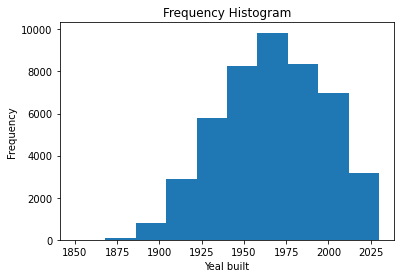

In [17]:
# Distribution of Year built
print(train_copy['Year built'].value_counts())
plt.hist(train_copy['Year built'], range=[1850, 2030])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Yeal built')
# plt.savefig('year_built_frequency.png')

# Percentage of speical value
counter = 0
for x in train_copy['Year built']:
    if x>2021:
        counter += 1
print(counter / len(train_copy['Year built']))



## Badrooms variable EDA

,bedroom num,Sold Price
bedroom num,1.000000,0.103965
Sold Price,0.103965,1.000000


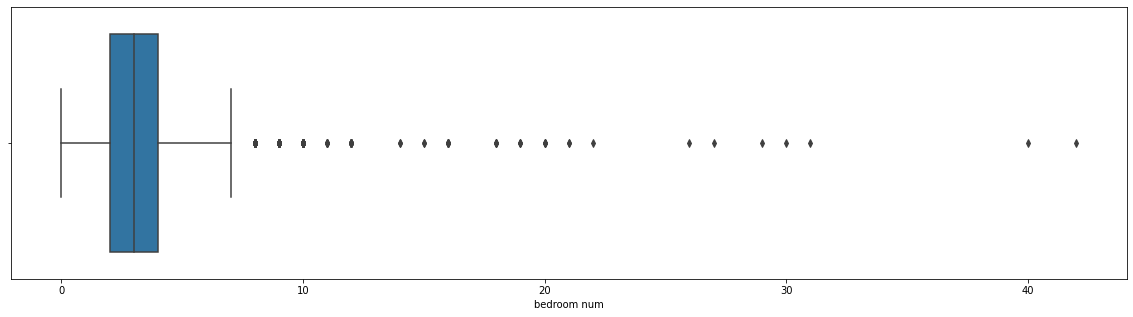

In [18]:
## Distribution of variables

train_copy['bedroom num'] = train_copy['Bedrooms'].fillna(24)
train_copy['bedroom num'] = train_copy['bedroom num'].replace('[a-zA-Z]', 24, regex=True)
train_copy['bedroom num'] = pd.Series(train_copy['bedroom num'], dtype=np.int)
train_bed_df = train_copy[train_copy['bedroom num'] != 24]

train_bed_df['bedroom num'].describe()

# correlation between bedroom num and sold price
plt.figure(figsize = (20,5))
sns.boxplot(x = train_bed_df['bedroom num'])
train_copy[['bedroom num', 'Sold Price']].corr()
# plt.savefig('bedrooms_frequency.png')

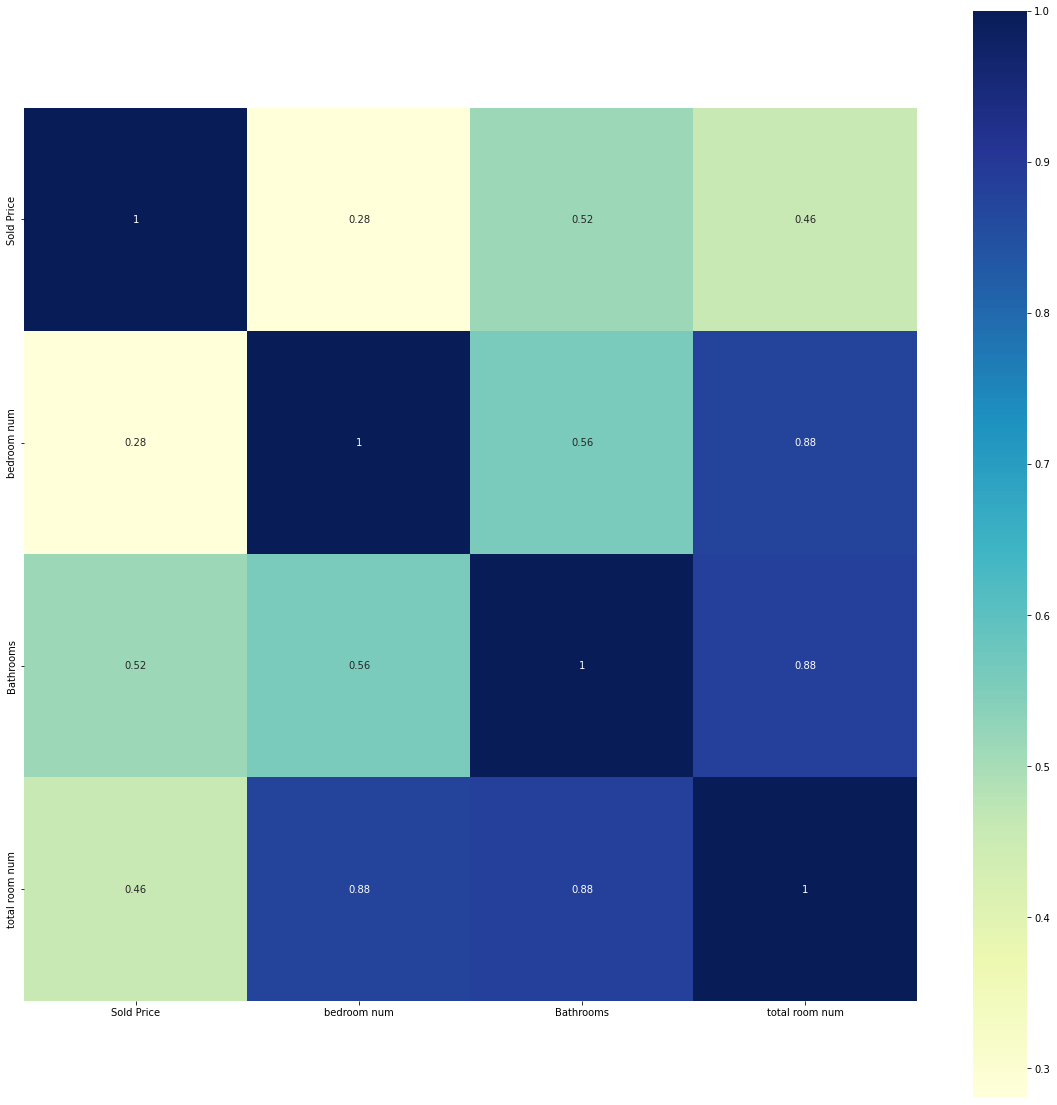

In [19]:
train_bed_df[['bedroom num', 'Sold Price']].corr()
train_copy['bedroom num'] = train_copy['bedroom num'].replace(24, 3)

train_copy['total room num'] = train_copy['bedroom num'] + train_copy['Bathrooms']
train_copy['total room num'] = train_copy['total room num'].apply(lambda x: 3 if x == 0 else x)
colormap = plt.cm.viridis
plt.figure(figsize = (20,20))
sns.heatmap(train_copy[['Sold Price','bedroom num', 'Bathrooms', 'total room num']].corr(), square = True, cmap="YlGnBu",annot = True)


## School scores EDA

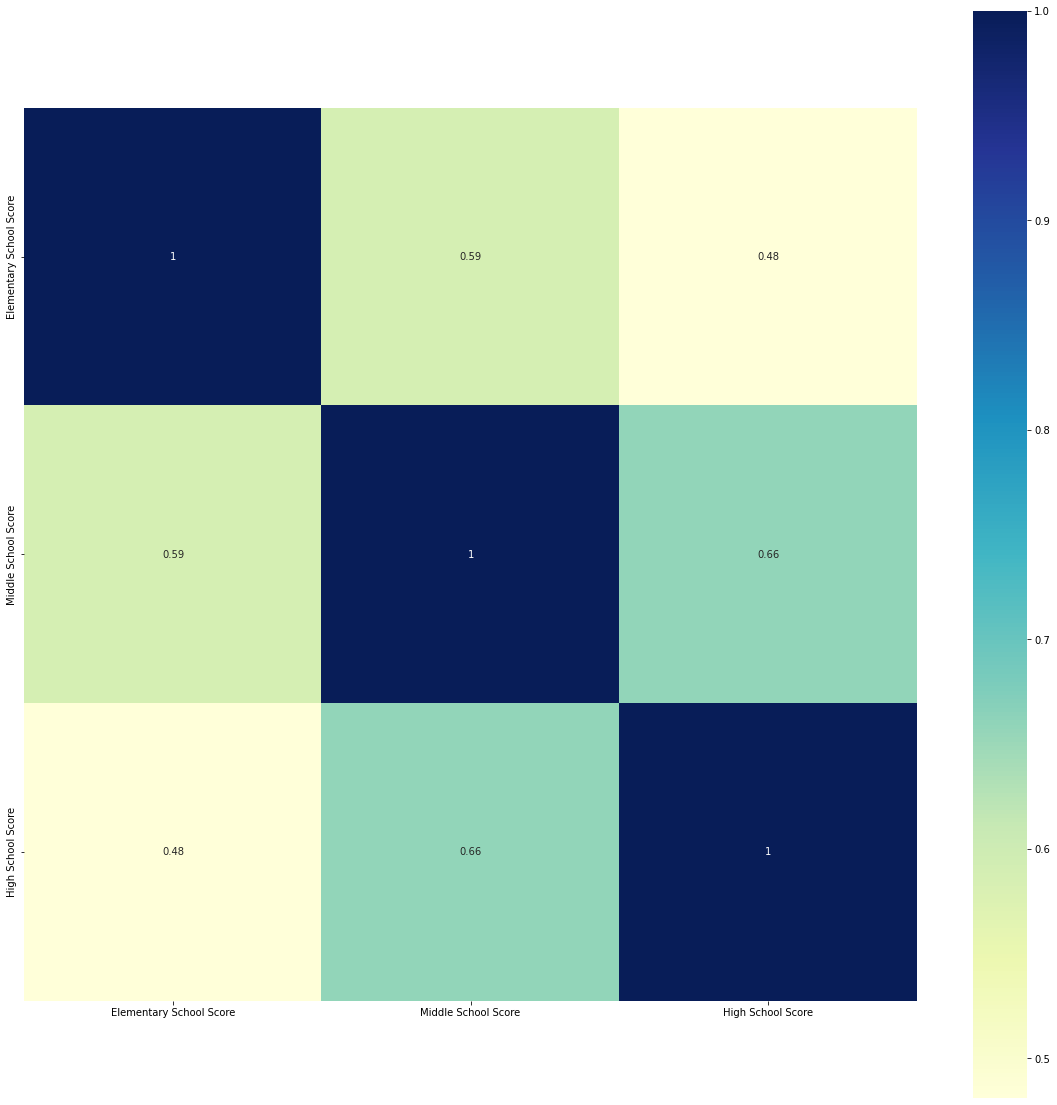

In [20]:

colormap = plt.cm.viridis
plt.figure(figsize = (20,20))
sns.heatmap(train_copy[['Elementary School Score','Middle School Score','High School Score']].corr(), square = True, cmap="YlGnBu",annot = True)
# plt.savefig('school_score_cor.png')

## Type variable EDA

In [21]:
train_copy['Type'].value_counts()
counter = 0
main = ['SingleFamily','Single Family','Condo','Townhouse','Unknown','MultiFamily','MobileManufactured','VacantLand']
for i in train_copy['Type']:
    if i in main:
        counter += 1
print(counter/len(train_copy["Type"]))

0.9873943379919475


# Deal with missing value of both training and testing set

## Simple fillings

In [15]:
# features = ['Listed Price', 'Last Sold Price','Tax assessed value','listed on year',
#             'Total interior livable area','Year built','Lot','Annual tax amount',
#             'High School','Middle School','Elementary School',
#             'bedroom num','total room num','price per room','score sum']

## =============填补缺失值================
# bathrooms
train_test['Bathrooms'] = train_test['Bathrooms'].fillna(2)

# Garage spaces
train_test['Garage spaces'] = train_test['Garage spaces'].fillna(0)
train_test['Garage spaces'] = train_test['Garage spaces'].replace('[a-zA-Z]', 1, regex=True)
train_test['Garage spaces'] = train_test['Garage spaces'].apply(lambda x: 0 if x < 1 else x)
train_test['Garage spaces'] = train_test['Garage spaces'].apply(lambda x: 10 if x > 10 else x)

# Lot
train_test['Lot'] = train_test['Lot'].fillna(train_test['Lot'].median())

# Year built
train_test['Year built'] = train_test['Year built'].fillna(train_test['Year built'].mode())

## =============构造新的特征===============
# bedroom num
train_test['bedroom num'] = train_test['Bedrooms'].fillna(3)
train_test['bedroom num'] = train_test['bedroom num'].replace('[a-zA-Z]', 3, regex=True)
train_test['bedroom num'] = train_test['bedroom num'].astype('int')

# total room
train_test['total room num'] = train_test['bedroom num'] + train_test['Bathrooms']
train_test['total room num'] = train_test['total room num'].apply(lambda x: 3 if x == 0 else x)

# price per room
train_test['price per room'] = train_test['Listed Price'] / train_test['total room num']
train_test['price per room'] = train_test['price per room'].fillna(train_test['price per room'].median())

# price per bedroom
train_test['price per bedroom'] = train_test['Listed Price'] / (train_test['bedroom num'] + 1)

# # price per bathroom
# train_test['price per bathroom'] = train_test['Listed Price'] / (train_test['Bathrooms'] + 1)

# listed on year
train_test['listed on year'] = train_test['Listed On'].str.extract(r'(\d{4})')
train_test['listed on year'] = train_test['listed on year'].astype('int')

# # listed on month
# train_test['listed on month'] = train_test['Listed On'].str.extract(r'\d{4}-(\d{2})-\d{2}')
# train_test['listed on month'] = train_test['listed on month'].astype('int')

# # listed on day
# train_test['listed on day'] = train_test['Listed On'].str.extract(r'\d{4}-\d{2}-(\d{2})')
# train_test['listed on day'] = train_test['listed on day'].astype('int')

# score sum
train_test['score sum'] = train_test['Elementary School Score'] + train_test['Middle School Score'] + train_test['High School Score']

# # city id
# train_test['city id'] = pd.factorize(train_test['City'])[0]

# zip str 
train_test['zip str'] = train_test['Zip'].astype('str')
train_test = train_test.drop(['Zip'], axis = 1)

# # zip id
# train_test['zip id'] = pd.factorize(train_test['zip str'])[0]

# # time interval
# train_test['time interval'] = train_test['listed on year'] - train_test['Year built']

## ============Sold Price 取对数处理==============
target_log = np.log1p(target)

## ============print==================
print('Process : missing value')

Process : missing value


In [16]:
## ============= new type =============
# 构造map
## Get the top 7 unique value of 'type' in map(or dict).
type_map = {
    'Condo': 'Condo',
    'Townhouse': 'Townhouse',
    'Unknown': 'Unknown',
    'MultiFamily': 'MultiFamily',
    'MobileManufactured': 'MobileManufactured',
    'VacantLand': 'VacantLand'
}
## Single family带空格也排前面几位，所以也容进去。
## 这个函数让type_map中添加了另个key并且这两个key的value都是singleFamily
type_map.update(dict.fromkeys(['SingleFamily','Single Family'],'SingleFamily'))

# map处理
## 添加一列将type_map中key与‘type'栏中对应的那一行添加对应的value
train_test['new type'] = train_test['Type'].map(type_map)

## 让不是这个列表里的其他乱七八糟的type都改成other
new_types_set = ['SingleFamily','Condo','Townhouse','Unknown','MultiFamily','MobileManufactured','VacantLand']
train_test['new type'] = train_test['new type'].apply(lambda x: 'Other' if x not in new_types_set else x)

# # get dummy
# ## 对new_type这一列做one-hot encoding
# type_dummy_df = pd.get_dummies(train_test['new type'], prefix = 'type')

# ## 每一个类型对应的一行是1，其他都是0.每一个类别在dataframe中是一个新的column
# train_test = pd.concat([train_test, type_dummy_df], axis = 1)

# train_test = train_test.drop(['Type','new type'], axis = 1)
# train_test = train_test.drop(['type_Condo','type_Townhouse','type_Unknown','type_MultiFamily','type_MobileManufactured','type_VacantLand','type_Other'], axis = 1)
# ## 为什么只留下了type——SingleFamily
# ## ============print==================
print('Process : type')

In [33]:
# # get dummy
# ## 对new_type这一列做one-hot encoding
type_dummy_df = pd.get_dummies(train_test['new type'], prefix = 'type')

# ## 每一个类型对应的一行是1，其他都是0.每一个类别在dataframe中是一个新的column
train_test = pd.concat([train_test, type_dummy_df], axis = 1)

train_test = train_test.drop(['Type','new type'], axis = 1)
train_test = train_test.drop(['type_Condo','type_Townhouse','type_Unknown','type_MultiFamily','type_MobileManufactured','type_VacantLand','type_Other'], axis = 1)
# ## 为什么只留下了type——SingleFamily
# ## ============print==================
print('Process : type')

Process : type


In [34]:
train_test.head()

,Listed Price,Last Sold Price,Tax assessed value,Garage spaces,Bedrooms,Listed On,Bathrooms,Full bathrooms,Total interior livable area,Year built,Lot,Annual tax amount,City,Elementary School,Middle School,High School,Elementary School Score,Middle School Score,High School Score,Elementary School Distance,Middle School Distance,High School Distance,Heating,Cooling,Parking,bedroom num,total room num,price per room,price per bedroom,listed on year,score sum,zip str,park_garage,park_attached,park_detached,park_driveway,park_coverd,no_park,heat_cen_forced_air,heat_forced_air,heat_cen_air,heat_gas,heat_other,cool_cen_air,cool_win_wall,cool_fan,cool_nan,type_SingleFamily
0,4198000.0,1.483197e+06,8.864860e+05,0.0,"Ground Floor Bedroom, Master Bedroom on Ground...",2019-10-24,0.0,0.345363,1.000000,1969.0,1.0,12580.00000,Los Altos,Santa Rita Elementary School,NaN,Los Altos High School,7.0,NaN,8.0,0.4,NaN,1.3,"Heating - 2+ Zones, Central Forced Air - Gas","Multi-Zone, Central AC, Whole House / Attic Fan","Garage, Garage - Attached, Covered",3,3.0,1.399333e+06,1.049500e+06,2019,19.0,94022,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,525000.0,3.280000e+05,5.050000e+05,1.0,3,2019-10-16,2.0,2.000000,872.000000,1926.0,4047.0,6253.00000,Los Angeles,Raymond Avenue Elementary School,John Muir Middle School,Augustus F. Hawkins High A Critical Design And...,3.0,2.0,2.0,0.8,1.1,1.3,Combination,"Wall/Window Unit(s), Evaporative Cooling, See ...","Detached Carport, Garage",3,5.0,1.050000e+05,1.312500e+05,2019,7.0,90047,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
2,180000.0,-4.627030e+04,4.962700e+04,0.0,2,2019-08-25,3.0,1.000000,1152.000000,1958.0,9147.0,468.00000,Strawberry,NaN,NaN,Long Barn High School,NaN,NaN,NaN,NaN,NaN,10.1,Forced air,nan,0 spaces,2,5.0,3.600000e+04,6.000000e+04,2019,15.0,95375,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1
3,1895000.0,1.500000e+06,1.775000e+06,0.0,5,2019-10-24,3.0,3.000000,2612.000000,1947.0,6753.0,20787.00000,Culver City,Farragut Elementary School,Culver City Middle School,Culver City High School,9.0,7.0,8.0,0.2,0.2,0.2,Central,Central Air,"Detached Carport, Driveway, Garage - Two Door",5,8.0,2.368750e+05,3.158333e+05,2019,24.0,90230,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1
4,1595000.0,9.000000e+05,7.105413e+05,0.0,NaN,2019-06-07,2.0,1.801485,5849.962912,NaN,6753.0,9019.86297,Creston,Santa Margarita Elementary School,Atascadero Middle School,Atascadero High School,6.0,5.0,6.0,8.5,10.2,10.6,nan,nan,0 spaces,3,5.0,3.190000e+05,3.987500e+05,2019,17.0,93432,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [17]:
## ================================ parking ============================
# 构造set
## 在观察文本后对出现数量最多的几个关键词归类
park_garage = ['Garage']
park_attached = ['Garage - Attached','Attached','Attached Carport']
park_detached = ['Garage - Detached']
park_driveway = ['Driveway']
park_coverd = ['Covered']
no_park = ['0 spaces','No Garage']

## 有些element是有数字的，所以要转换成str（‘0 space'）
## 问题： 空格怎么办
train_test['Parking'] = train_test['Parking'].astype('str')

## 建造几个新的feature，这个feature是由parking转化而来的，相当于一个one-hot encoding的过程。将Parking中每一个元素对比
## 之前分类，符合就是1，不符合就是0。代码中通过and这个逻辑运算链接Parking中value的由逗号分开的关键词(注，空格也会被算成一个字符)
## 把这两个set进行对比，如果有重合的element，说明符合该分类，记为1
train_test['park_garage'] = train_test['Parking'].apply(lambda x: 1 if (set(x.split(',')) & set(park_garage)) else 0)
train_test['park_attached'] = train_test['Parking'].apply(lambda x: 1 if (set(x.split(',')) & set(park_attached)) else 0)
train_test['park_detached'] = train_test['Parking'].apply(lambda x: 1 if (set(x.split(',')) & set(park_detached)) else 0)
train_test['park_driveway'] = train_test['Parking'].apply(lambda x: 1 if (set(x.split(',')) & set(park_driveway)) else 0)
train_test['park_coverd'] = train_test['Parking'].apply(lambda x: 1 if (set(x.split(',')) & set(park_coverd)) else 0)
train_test['no_park'] = train_test['Parking'].apply(lambda x: 1 if (set(x.split(',')) & set(no_park)) else 0)

## ============print==================
print('Process : parking')

Process : parking


In [18]:
## ================================ heating ============================
# 构造set
heat_cen_forced_air = ['Central Forced Air - Gas','Central Forced Air']
heat_forced_air = ['Forced air','Forced Air','Forced Air - Gas','Forced Air - Elec','Forced Air-Gas','Forced - Electric']
heat_cen_air = ['Central']
heat_gas = ['Gas','Natural Gas']
heat_other = ['Other']

train_test['Heating'] = train_test['Heating'].astype('str')

train_test['heat_cen_forced_air'] = train_test['Heating'].apply(lambda x: 1 if (set(x.split(',')) & set(heat_cen_forced_air)) else 0)
train_test['heat_forced_air'] = train_test['Heating'].apply(lambda x: 1 if (set(x.split(',')) & set(heat_forced_air)) else 0)
train_test['heat_cen_air'] = train_test['Heating'].apply(lambda x: 1 if (set(x.split(',')) & set(heat_cen_air)) else 0)
train_test['heat_gas'] = train_test['Heating'].apply(lambda x: 1 if (set(x.split(',')) & set(heat_gas)) else 0)
train_test['heat_other'] = train_test['Heating'].apply(lambda x: 1 if (set(x.split(',')) & set(heat_other)) else 0)

## ============print==================
print('Process : heating')

Process : heating


In [19]:
## ================================ cooling ============================
# 构造set
cool_cen_air = ['Central AC','Central Air','Central','Air Conditioning','AC Central','2 Ac Central Units']
cool_win_wall = ['Window Unit','Wall/Window Unit(s)','Window Unit(s)','Window / Wall Unit','Wall/Window','Wall Unit(s)','Wall']
cool_fan = ['Whole House / Attic Fan','Ceiling Fan(s)','Whole House Fan','Ceiling Fans','Ceiling Fans Pre-Wired','Attic Fan']
cool_nan = ['nan']

##自己思考，不要求写出来，这部分为什么不要了
# cool_evap = ['Evaporative Cooling','Evaporative Cooler','Evaporative','Evap Central']
# cool_refg = ['Refrigerator']
# no_cool = ['None','No Air Conditioning']
# cool_other = ['Other']

train_test['Cooling'] = train_test['Cooling'].astype('str')

train_test['cool_cen_air'] = train_test['Cooling'].apply(lambda x: 1 if (set(x.split(',')) & set(cool_cen_air)) else 0)
train_test['cool_win_wall'] = train_test['Cooling'].apply(lambda x: 1 if (set(x.split(',')) & set(cool_win_wall)) else 0)
train_test['cool_fan'] = train_test['Cooling'].apply(lambda x: 1 if (set(x.split(',')) & set(cool_fan)) else 0)
train_test['cool_nan'] = train_test['Cooling'].apply(lambda x: 1 if (set(x.split(',')) & set(cool_nan)) else 0)

## ============print==================
print('Process : cooling')

Process : cooling


In [20]:
from google.colab import files
train_copy['Bathrooms'] = train_copy['Bathrooms'].fillna(2)
fullbath_df = train_copy[['Full bathrooms','Bathrooms']] # 得到所有关于厕所的feature
filling = train_test[['Full bathrooms','Bathrooms']]
## pd.loc(row, column)/pd.loc(condition)（这里是行的或者说是单个observation的condition）
## 用这个函数筛选出null以及不是null的observations
## 这里筛选出来的是fullbath_df是null或者不是null的那一行，包括full bathrooms和bathrooms两列，所以最后X和Y才能shape相同
fullbath_notnull_df = fullbath_df.loc[(fullbath_df['Full bathrooms'].notnull())]
fullbath_isnull_df = filling.loc[(filling['Full bathrooms'].isnull())]
## 前面对bathroom进行了填充，所以这里通过bathroom来用模型预测full bathrooms的值
## 把full bathroom分为null和不null，用不null的训练然后用来预测null的来进行填充
fullbath_X = fullbath_notnull_df.values[:, 1:] # Bathroom
fullbath_Y = fullbath_notnull_df.values[:, 0] # Fullbathroom
# fullbath_notnull_df.to_csv('full_bathroom_train.csv')
# files.download('full_bathroom_train.csv')

In [21]:
## =============full bathrooms=============
from sklearn.ensemble import RandomForestRegressor
# from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression


lm_fullbath = LinearRegression().fit(fullbath_X, fullbath_Y)
fullbath_pred = lm_fullbath.predict(fullbath_isnull_df.values[:,1:])
train_test.loc[train_test['Full bathrooms'].isnull(), ['Full bathrooms']] = fullbath_pred
# ## 用fullbathroom的数量来预测bathroom的数量
# lgbm_fullbath = LGBMRegressor(objective='regression',learning_rate=0.05,n_estimators=500,max_depth=4,subsample=1)
# lgbm_fullbath.fit(fullbath_X, fullbath_Y)
# fullbath_pred = lgbm_fullbath.predict(fullbath_isnull_df.values[:,1:]) 
# train_test.loc[train_test['Full bathrooms'].isnull(), ['Full bathrooms']] = fullbath_pred # 在Full bathrooms这一列中是null的element赋值为预测值

# rf_fullbath = RandomForestRegressor(n_estimators = 200)
# rf_fullbath.fit(fullbath_X, fullbath_Y)
# fullbath_pred = rf_fullbath.predict(fullbath_isnull_df.values[:,1:])
# train_test.loc[train_test['Full bathrooms'].isnull(), ['Full bathrooms']] = fullbath_pred

## ============print==================
print('Process : full bathrooms')

Process : full bathrooms


In [22]:
livearea_df = train_test[0:47439][['Total interior livable area','Full bathrooms']]
filling = train_test[['Total interior livable area','Full bathrooms']]
livearea_notnull_df = livearea_df.loc[(livearea_df['Total interior livable area'].notnull())]
livearea_isnull_df = filling.loc[(filling['Total interior livable area'].isnull())]
livearea_X = livearea_notnull_df.values[:, 1:]
livearea_Y = livearea_notnull_df.values[:, 0]

In [44]:
from google.colab import files
# livearea_notnull_df.to_csv('total_interior_train.csv')
# files.download('total_interior_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
## ===============total livable area===================
from sklearn.ensemble import RandomForestRegressor
# from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

lm_livearea = LinearRegression().fit(livearea_X, livearea_Y)
livearea_pred = lm_livearea.predict(livearea_isnull_df.values[:,1:])
train_test.loc[train_test['Total interior livable area'].isnull(), ['Total interior livable area']] = livearea_pred

# lgbm_livearea = LGBMRegressor(objective='regression',learning_rate=0.05,n_estimators=500,max_depth=5,subsample=1)
# lgbm_livearea.fit(livearea_X, livearea_Y)
# livearea_pred = lgbm_livearea.predict(livearea_isnull_df.values[:,1:])
# train_test.loc[train_test['Total interior livable area'].isnull(), ['Total interior livable area']] = livearea_pred

# rf_livearea = RandomForestRegressor(n_estimators = 200)
# rf_livearea.fit(livearea_X, livearea_Y)
# livearea_pred = rf_livearea.predict(livearea_isnull_df.values[:,1:])
# train_test.loc[train_test['Total interior livable area'].isnull(), ['Total interior livable area']] = livearea_pred

## ============print==================
print('Process : total livable area')

Process : total livable area


In [24]:
## Score sum
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


score_df_new = train_test[0:47439][['score sum','Elementary School Score','Middle School Score','High School Score']]
filling = train_test[['score sum','Elementary School Score','Middle School Score','High School Score']]
score_notnull_df_new = score_df_new.loc[(score_df_new['score sum'].notnull())]
score_isnull_df_new = filling.loc[(filling['score sum'].isnull())]
score_X_new = score_notnull_df_new.values[:, 1:]
score_Y_new = score_notnull_df_new.values[:, 0]

for col in ['Elementary School Score','Middle School Score','High School Score']:
    score_isnull_df_new[col] = score_isnull_df_new[col].fillna(score_isnull_df_new[col].median())

total_score = LinearRegression().fit(score_X_new, score_Y_new)
score_pred_new = total_score.predict(score_isnull_df_new.values[:,1:])

train_test.loc[train_test['score sum'].isnull(), ['score sum']] = score_pred_new


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Tax assessd value missing value

In [25]:
## ===========Tax assessed value===========
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression


tax_df = train_test[0:47439][['Tax assessed value','Bathrooms','Listed Price']]
filling = train_test[['Tax assessed value','Bathrooms','Listed Price']]
tax_notnull_df = tax_df.loc[(tax_df['Tax assessed value'].notnull())]
tax_isnull_df = filling.loc[(filling['Tax assessed value'].isnull())]
tax_X = tax_notnull_df.values[:, 1:]
tax_Y = tax_notnull_df.values[:, 0]



In [63]:
from google.colab import files
# tax_notnull_df.to_csv('tax_accessed_train.csv')
# files.download('tax_accessed_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
tax_acess_model = LinearRegression().fit(tax_X, tax_Y)
tax_pred = tax_acess_model.predict(tax_isnull_df.values[:, 1:])
train_test.loc[train_test['Tax assessed value'].isnull(), ['Tax assessed value']] = tax_pred

# rf_tax = RandomForestRegressor(n_estimators = 200)
# rf_tax.fit(tax_X, tax_Y)
# tax_pred = rf_tax.predict(tax_isnull_df.values[:, 1:])
# train_test.loc[train_test['Tax assessed value'].isnull(), ['Tax assessed value']] = tax_pred

## ============print==================
print('Process : tax assessed value')

Process : tax assessed value


In [27]:
## ==============Annual tax amount==============
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression

antax_df = train_test[0:47439][['Annual tax amount','Tax assessed value']]
filling = train_test[['Annual tax amount','Tax assessed value']]
antax_notnull_df = antax_df.loc[(antax_df['Annual tax amount'].notnull())]
antax_isnull_df = filling.loc[(filling['Annual tax amount'].isnull())]
antax_X = antax_notnull_df.values[:, 1:]
antax_Y = antax_notnull_df.values[:, 0]



In [84]:
from google.colab import files
# antax_notnull_df.to_csv('annual_tax_train.csv')
# files.download('annual_tax_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
annual_tax_model = LinearRegression().fit(antax_X, antax_Y)
antax_pred = annual_tax_model.predict(antax_isnull_df.values[:, 1:])
train_test.loc[train_test['Annual tax amount'].isnull(), ['Annual tax amount']] = antax_pred

# rf_antax = RandomForestRegressor(n_estimators = 200)
# rf_antax.fit(antax_X, antax_Y)
# antax_pred = rf_antax.predict(antax_isnull_df.values[:, 1:])
# train_test.loc[train_test['Annual tax amount'].isnull(), ['Annual tax amount']] = antax_pred

## ============print==================
print('Process : annual tax amout')

Process : annual tax amout


In [29]:
# =============last sold price===========
# use random forest model to fill missing values
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

last_price_df = train_test[0:47439][['Last Sold Price','Listed Price','Bathrooms','bedroom num','score sum',
                            'Annual tax amount','Tax assessed value','Total interior livable area']]
filling = train_test[['Last Sold Price','Listed Price','Bathrooms','bedroom num','score sum',
                            'Annual tax amount','Tax assessed value','Total interior livable area']]
last_price_notnull = last_price_df.loc[(last_price_df['Last Sold Price'].notnull())]
last_price_isnull = filling.loc[(filling['Last Sold Price'].isnull())]
last_price_X = last_price_notnull.values[:, 1:]
last_price_Y = last_price_notnull.values[:, 0]



In [87]:
from google.colab import files
# last_price_notnull.to_csv('last_sold_train.csv')
# files.download('last_sold_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
lastprice_model = LinearRegression().fit(last_price_X, last_price_Y)
lastprice_pred = lastprice_model.predict(last_price_isnull.values[:, 1:])
train_test.loc[train_test['Last Sold Price'].isnull(), ['Last Sold Price']] = lastprice_pred

# rf_lastprice = RandomForestRegressor(n_estimators = 200)
# rf_lastprice.fit(last_price_X, last_price_Y)
# lastprice_pred = rf_lastprice.predict(last_price_isnull.values[:, 1:])
# train_test.loc[train_test['Last Sold Price'].isnull(), ['Last Sold Price']] = lastprice_pred

## ============print==================
print('Process : last sold price')

Process : last sold price


## Summary of previous work

In [36]:
drop_features = ['Elementary School','Middle School','High School','Bedrooms','Listed On','Elementary School Score','Middle School Score','High School Score','Heating','Cooling','Parking']
train_test = train_test.drop(drop_features, axis = 1)

In [38]:
all_nan = pd.DataFrame(train_test.isnull().sum(), columns=['nan_sum'])
all_nan['percentage %'] = all_nan['nan_sum'] / train_test.shape[0] * 100
all_nan

,nan_sum,percentage %
Listed Price,0,0.000000
Last Sold Price,0,0.000000
Tax assessed value,0,0.000000
Garage spaces,0,0.000000
Bathrooms,0,0.000000
Full bathrooms,0,0.000000
Total interior livable area,0,0.000000
Year built,1942,2.456207
Lot,0,0.000000
Annual tax amount,0,0.000000


## Deal with distance related variable and year built variable

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Year Built'),
 Text(0.5, 1.0, 'Frequency Histogram')]

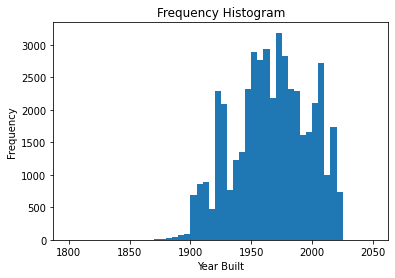

In [43]:
# Year built
plt.hist(train_test[0:47439]['Year built'], bins=50, range=[1800, 2050])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Year Built')

In [44]:
train_test['Year built'] = train_test['Year built'].fillna(train_test[0:47439]['Year built'].mean())

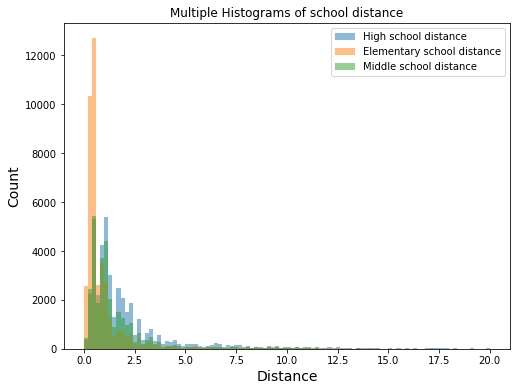

In [49]:
# Distance
# plt.hist(train_test[0:47439]['High School Distance'], bins=50, range=[0,20])
# plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='High School Distance')
plt.figure(figsize=(8,6))
plt.hist(train_test[0:47439]['High School Distance'], bins=100,range=[0,20], alpha=0.5, label="High school distance")
plt.hist(train_test[0:47439]['Elementary School Distance'], bins=100,range=[0,20], alpha=0.5, label="Elementary school distance")
plt.hist(train_test[0:47439]['Middle School Distance'], bins=100,range=[0,20], alpha=0.5, label="Middle school distance")
plt.xlabel("Distance", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms of school distance")
plt.legend(loc='upper right')
# plt.savefig("overlapping_histograms_with_matplotlib_Python.png")


In [ ]:
## Distance variables
train_test['Year built'] = train_test['Year built'].fillna(train_test[0:47439]['Year built'].mean())

In [50]:
continue_drop = ['Elementary School Distance', "Middle School Distance", "High School Distance"]
train_test = train_test.drop(continue_drop, axis = 1)

In [52]:
## 再把train_test分开，还原训练集和测试集
training_data_set = train_test[0:47439]
testing_data_set = train_test[47439:]

In [51]:
all_nan = pd.DataFrame(train_test.isnull().sum(), columns=['nan_sum'])
all_nan['percentage %'] = all_nan['nan_sum'] / train_test.shape[0] * 100
all_nan

,nan_sum,percentage %
Listed Price,0,0.0
Last Sold Price,0,0.0
Tax assessed value,0,0.0
Garage spaces,0,0.0
Bathrooms,0,0.0
Full bathrooms,0,0.0
Total interior livable area,0,0.0
Year built,0,0.0
Lot,0,0.0
Annual tax amount,0,0.0


In [53]:
# from google.colab import files
# training_data_set.to_csv('cleaned_training set.csv')
# files.download('cleaned_training set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
training_data_set = pd.concat([target, training_data_set], axis=1)
training_data_set.drop('City', axis=1)
training_data_set.columns
# training_data_set['zip str']

Index(['Sold Price', 'Sold Price', 'Sold Price', 'Listed Price',
       'Last Sold Price', 'Tax assessed value', 'Garage spaces', 'Bathrooms',
       'Full bathrooms', 'Total interior livable area', 'Year built', 'Lot',
       'Annual tax amount', 'City', 'bedroom num', 'total room num',
       'price per room', 'price per bedroom', 'listed on year', 'score sum',
       'zip str', 'park_garage', 'park_attached', 'park_detached',
       'park_driveway', 'park_coverd', 'no_park', 'heat_cen_forced_air',
       'heat_forced_air', 'heat_cen_air', 'heat_gas', 'heat_other',
       'cool_cen_air', 'cool_win_wall', 'cool_fan', 'cool_nan',
       'type_SingleFamily'],
      dtype='object')

In [56]:
# from google.colab import files
# training_data_set.to_csv('cleaned_training set.csv')
# files.download('cleaned_training set.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
cleaned = pd.read_csv(io.BytesIO(uploaded['cleaned_training_set 9.24.59 AM.csv']))

In [7]:
cleaned.columns

Index(['Unnamed: 0', 'Sold Price', 'Listed Price', 'Last Sold Price',
       'Tax assessed value', 'Garage spaces', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Year built', 'Lot', 'Annual tax amount',
       'City', 'bedroom num', 'total room num', 'price per room',
       'price per bedroom', 'listed on year', 'score sum', 'zip str',
       'park_garage', 'park_attached', 'park_detached', 'park_driveway',
       'park_coverd', 'no_park', 'heat_cen_forced_air', 'heat_forced_air',
       'heat_cen_air', 'heat_gas', 'heat_other', 'cool_cen_air',
       'cool_win_wall', 'cool_fan', 'cool_nan', 'type_SingleFamily'],
      dtype='object')

In [8]:
cleaned = cleaned.drop(['park_garage', 'park_attached', 'park_detached',
       'park_driveway', 'park_coverd', 'no_park', 'heat_cen_forced_air',
       'heat_forced_air', 'heat_cen_air', 'heat_gas', 'heat_other',
       'cool_cen_air', 'cool_win_wall', 'cool_fan', 'cool_nan','Unnamed: 0', 'City','price per room',
       'price per bedroom', 'listed on year'], axis = 1)

In [9]:
cleaned.columns

Index(['Sold Price', 'Listed Price', 'Last Sold Price', 'Tax assessed value',
       'Garage spaces', 'Bathrooms', 'Full bathrooms',
       'Total interior livable area', 'Year built', 'Lot', 'Annual tax amount',
       'bedroom num', 'total room num', 'score sum', 'zip str',
       'type_SingleFamily'],
      dtype='object')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

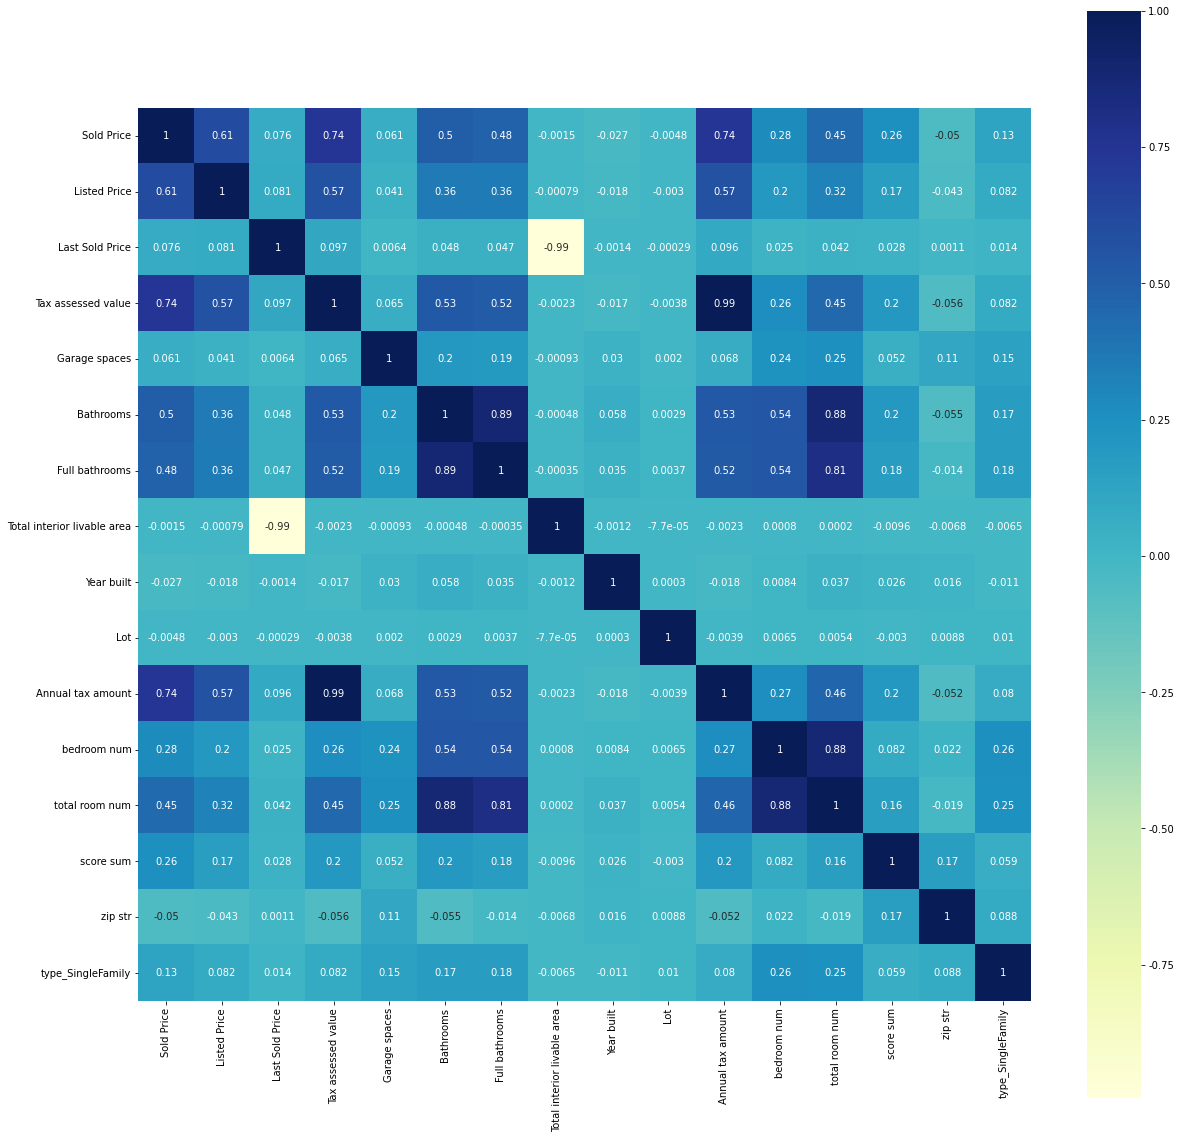

In [12]:
colormap = plt.cm.viridis
plt.figure(figsize = (20,20))
sns.heatmap(cleaned.corr(), square = True, cmap="YlGnBu",annot = True)
from google.colab import files
plt.savefig("final_corr.png")
files.download("final_corr.png") 

In [5]:
import io
cleaned = pd.read_csv(io.BytesIO(uploaded['cleaned_training_set.csv']))

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Sold Price'),
 Text(0.5, 1.0, 'Frequency Histogram')]

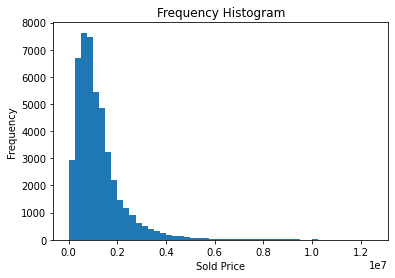

In [20]:
# Year built
plt.hist(cleaned['Sold Price'], bins=50, range=[-10,12500000])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Sold Price')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Sold Price'),
 Text(0.5, 1.0, 'Frequency Histogram')]

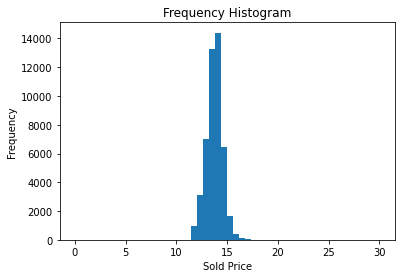

In [14]:
# Year built
plt.hist(np.log(cleaned['Sold Price']), bins=50, range=[0,30])
plt.gca().set(title='Frequency Histogram', ylabel='Frequency',xlabel='Sold Price')

In [22]:
cleaned['Sold Price'].describe()

count    4.743900e+04
mean     1.296050e+06
std      1.694452e+06
min      1.005000e+05
25%      5.650000e+05
50%      9.600000e+05
75%      1.525000e+06
max      9.000000e+07
Name: Sold Price, dtype: float64